<h2>Capstone - Project Notes 2</h2><br>
<h3>Shubhadeep Bhattacharya<br>
Batch: DSBA - Oct 2019<br><br></h3>

In [2]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the processed data from the csv file created in phase 1

In [4]:
data = pd.read_csv('pn1_output.csv')

In [5]:
data.head()

,Unnamed: 0,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,...,1,0,0,0,0,1,0,0,0,1
1,1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,...,0,0,1,1,0,0,1,0,0,1
2,2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,...,1,0,0,1,0,0,1,0,0,1
3,3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,...,1,0,0,1,0,1,0,0,0,1
4,4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,...,0,0,0,1,0,0,1,0,0,1


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,...,0,0,1,1,0,0,1,0,0,1
2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,...,0,0,0,1,0,0,1,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   float64
 7   Complain                             5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             

#### Splitting the Dependent Variable and the Independent Variable Columns

In [176]:
X = data.drop('Churn', axis=1)

In [177]:
y = data[['Churn']]

In [178]:
X.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,1.0,...,0,0,1,1,0,0,1,0,0,1
2,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,1.0,...,1,0,0,1,0,0,1,0,0,1
3,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,1.0,...,1,0,0,1,0,1,0,0,0,1
4,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1


In [179]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


### Train Test Split

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [182]:
X_train.shape

(3941, 26)

In [183]:
y_train.shape

(3941, 1)

In [184]:
X_test.shape

(1689, 26)

In [185]:
y_test.shape

(1689, 1)

In [186]:
X_train.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
200,4.0,13.0,2.0,4,3,2.0,0,24.0,3.0,8.0,...,1,0,0,0,0,0,0,0,0,0
4044,20.0,31.0,4.0,4,1,3.0,0,17.0,1.0,2.0,...,1,0,0,1,0,0,1,0,0,1
572,5.0,26.0,2.0,3,2,2.0,0,15.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2850,1.0,26.0,4.0,4,2,3.0,0,25.0,1.0,3.0,...,0,0,0,1,0,0,1,0,0,0
734,5.0,21.0,3.0,5,2,1.0,1,18.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [187]:
X_test.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
1355,8.0,13.0,2.0,1,4,1.0,0,13.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
4952,1.0,36.0,3.0,5,3,3.0,0,23.0,3.0,4.0,...,0,0,0,0,0,1,0,0,0,1
194,5.0,14.0,3.0,4,4,2.0,1,11.0,6.0,11.0,...,0,0,0,0,0,1,0,0,0,0
2503,10.0,25.0,2.0,3,3,4.0,0,17.0,0.0,1.0,...,1,0,0,1,0,1,0,0,1,0
2762,4.0,8.0,3.0,3,3,1.0,0,19.0,0.0,1.0,...,1,0,0,1,0,0,1,0,1,0


### Scaling

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#### Scaling the numeric data

** NOTE ** we fit_transform the train data & only transform the test data: so we use the same mean and sd for test transform. 

In [189]:
data_num = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder','CashbackAmount']

In [190]:
X_train[data_num] = sc.fit_transform(X_train[data_num])


In [191]:
X_test[data_num] = sc.transform(X_test[data_num])

In [192]:
X_train

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
200,-0.700757,-0.294588,-1.345919,0.303483,3,-0.871737,0,2.322970,0.721498,1.774954,...,1,0,0,0,0,0,0,0,0,0
4044,1.207802,1.937572,1.508138,0.303483,1,-0.482399,0,0.380802,-0.433896,-0.355748,...,1,0,0,1,0,0,1,0,0,1
572,-0.581472,1.317528,-1.345919,-0.682524,2,-0.871737,0,-0.174103,-1.011593,-0.710865,...,0,0,0,0,0,0,1,0,0,0
2850,-1.058612,1.317528,1.508138,0.303483,2,-0.482399,0,2.600422,-0.433896,-0.000631,...,0,0,0,1,0,0,1,0,0,0
734,-0.581472,0.697483,0.081110,1.289490,2,-1.261074,1,0.658255,-0.433896,-0.710865,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0.611377,0.201448,1.508138,1.289490,5,0.685613,0,-0.451556,0.721498,1.774954,...,1,0,0,1,1,0,0,0,1,0
2550,-1.058612,-0.914633,0.081110,-0.682524,4,-0.871737,0,-1.006461,-1.011593,-0.710865,...,1,0,0,1,0,0,1,0,0,1
537,-1.058612,-0.914633,-1.345919,0.303483,3,-0.871737,0,-0.729008,-1.011593,-0.710865,...,0,0,0,0,0,0,1,0,0,1
1220,-0.223618,0.821492,-1.345919,0.303483,4,-1.261074,1,-1.283913,-0.433896,-0.710865,...,0,0,1,0,0,1,0,0,1,0


In [193]:
X_test

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
1355,-0.223618,-0.294588,-1.345919,-2.654538,4,-1.261074,0,-0.729008,-0.433896,-0.710865,...,0,0,0,1,0,0,1,0,1,0
4952,-1.058612,2.557617,0.081110,1.289490,3,-0.482399,0,2.045517,0.721498,0.354486,...,0,0,0,0,0,1,0,0,0,1
194,-0.581472,-0.170579,0.081110,0.303483,4,-0.871737,1,-1.283913,2.454590,2.840304,...,0,0,0,0,0,1,0,0,0,0
2503,0.014952,1.193519,-1.345919,-0.682524,3,-0.093062,0,0.380802,-1.011593,-0.710865,...,1,0,0,1,0,1,0,0,1,0
2762,-0.700757,-0.914633,0.081110,-0.682524,3,-1.261074,0,0.935707,-1.011593,-0.710865,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,-0.581472,-1.162650,-1.345919,-0.682524,5,-0.482399,0,1.768065,-0.433896,-0.710865,...,1,0,0,0,0,0,1,0,0,0
4938,1.207802,-0.046570,1.508138,1.289490,5,2.242963,1,2.322970,0.143801,-0.355748,...,1,0,0,0,0,1,0,0,1,0
5553,-1.058612,0.077439,0.081110,0.303483,1,-0.482399,0,-0.174103,0.143801,-0.355748,...,0,1,0,1,0,1,0,0,0,1
5462,-0.104333,1.813563,1.508138,2.275497,3,-0.871737,0,0.380802,-0.433896,-0.355748,...,0,0,0,1,0,0,1,0,1,0


In [19]:
X.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

### MODEL BUILDING

In [194]:
# importing the metrics required to assess performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

### Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression

In [196]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [197]:
## Prediction and performance metrics on train data set
log_train_predict = log_model.predict(X_train)
log_train_score = log_model.score(X_train, y_train)
print(log_train_score)
print(confusion_matrix(y_train, log_train_predict))
print(classification_report(y_train, log_train_predict))


0.8979954326313119
[[3179  105]
 [ 297  360]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3284
           1       0.77      0.55      0.64       657

    accuracy                           0.90      3941
   macro avg       0.84      0.76      0.79      3941
weighted avg       0.89      0.90      0.89      3941



Area under Curve is 0.7579860010344885


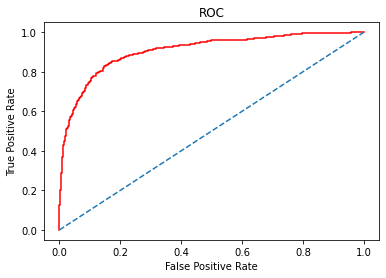

In [198]:
# ROC, AUC for Training Data
log_train_fpr, log_train_tpr,_=roc_curve(y_train,log_model.predict_proba(X_train)[:,1])
plt.plot(log_train_fpr,log_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_train_auc=roc_auc_score(y_train,log_model.predict(X_train))
print('Area under Curve is', log_train_auc)

In [199]:
## Prediction and performance metrics on test data set
log_test_predict = log_model.predict(X_test)
log_test_score = log_model.score(X_test, y_test)
print(log_test_score)
print(confusion_matrix(y_test, log_test_predict))
print(classification_report(y_test, log_test_predict))


0.8916518650088809
[[1355   43]
 [ 140  151]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1398
           1       0.78      0.52      0.62       291

    accuracy                           0.89      1689
   macro avg       0.84      0.74      0.78      1689
weighted avg       0.88      0.89      0.88      1689



Area under Curve is 0.7440710588027077


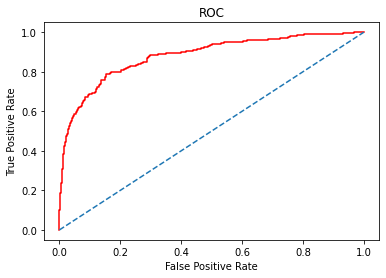

In [200]:
# ROC, AUC for Test Data
log_test_fpr, log_test_tpr,_=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(log_test_fpr,log_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_test_auc=roc_auc_score(y_test,log_model.predict(X_test))
print('Area under Curve is', log_test_auc)

In [201]:
## model coefficients

In [202]:
log_model.coef_

array([[-1.91592868,  0.38390512, -0.07006554,  0.42297054,  0.30224255,
         0.66289717,  1.82634261, -0.09630241,  0.07440239,  0.48673503,
        -0.40535445, -0.55643029, -0.5239405 ,  0.84535799,  0.64083372,
        -0.68968883, -0.46383926,  0.19097285, -0.55906392,  0.31585737,
         0.16915987, -1.48767184, -0.39027913,  1.72205299, -0.39493475,
         0.63374642]])

In [203]:
n=0
for column in X_train.columns:
    print(column,': ', '%f' %log_model.coef_[0,n])
    n=n+1

Tenure :  -1.915929
WarehouseToHome :  0.383905
HourSpendOnApp :  -0.070066
NumberOfDeviceRegistered :  0.422971
SatisfactionScore :  0.302243
NumberOfAddress :  0.662897
Complain :  1.826343
OrderAmountHikeFromlastYear :  -0.096302
CouponUsed :  0.074402
OrderCount :  0.486735
DaySinceLastOrder :  -0.405354
CashbackAmount :  -0.556430
PreferredLoginDevice_Mobile Phone :  -0.523940
CityTier_2 :  0.845358
CityTier_3 :  0.640834
PreferredPaymentMode_Credit Card :  -0.689689
PreferredPaymentMode_Debit Card :  -0.463839
PreferredPaymentMode_E wallet :  0.190973
PreferredPaymentMode_UPI :  -0.559064
Gender_Male :  0.315857
PreferedOrderCat_Grocery :  0.169160
PreferedOrderCat_Laptop & Accessory :  -1.487672
PreferedOrderCat_Mobile Phone :  -0.390279
PreferedOrderCat_Others :  1.722053
MaritalStatus_Married :  -0.394935
MaritalStatus_Single :  0.633746


### Linear Discriminant Analysis

In [205]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [221]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [212]:
## Performance metrics on train data set
lda_train_predict = lda_model.predict(X_train)
lda_train_score = lda_model.score(X_train, y_train)
print(lda_train_score)
print(confusion_matrix(y_train, lda_train_predict))
print(classification_report(y_train, lda_train_predict))

0.8911443795990865
[[3179  105]
 [ 324  333]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3284
           1       0.76      0.51      0.61       657

    accuracy                           0.89      3941
   macro avg       0.83      0.74      0.77      3941
weighted avg       0.88      0.89      0.88      3941



Area under Curve is 0.7374380558290091


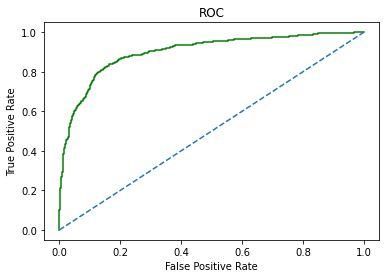

In [213]:
# ROC, AUC for Training Data
lda_train_fpr, lda_train_tpr,_=roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.plot(lda_train_fpr,lda_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_train_auc=roc_auc_score(y_train,lda_model.predict(X_train))
print('Area under Curve is', lda_train_auc)

In [214]:
lda_test_predict = lda_model.predict(X_test)
lda_test_score = lda_model.score(X_test, y_test)
print(lda_test_score)
print(confusion_matrix(y_test, lda_test_predict))
print(classification_report(y_test, lda_test_predict))

0.8928359976317347
[[1357   41]
 [ 140  151]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1398
           1       0.79      0.52      0.63       291

    accuracy                           0.89      1689
   macro avg       0.85      0.74      0.78      1689
weighted avg       0.89      0.89      0.88      1689



Area under Curve is 0.7447863663849682


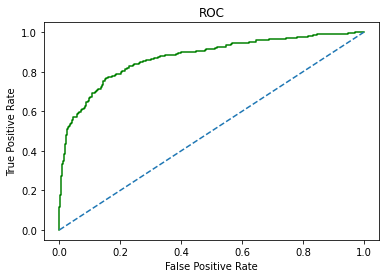

In [215]:
# ROC, AUC for Test Data
lda_test_fpr, lda_test_tpr,_=roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(lda_test_fpr,lda_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_auc=roc_auc_score(y_test,lda_model.predict(X_test))
print('Area under Curve is', lda_test_auc)

In [216]:
lda_model.coef_

array([[-1.34677357,  0.3101266 , -0.08584756,  0.37219975,  0.28646209,
         0.58499223,  2.08382701, -0.03523677,  0.08006836,  0.28552224,
        -0.31664163, -0.55013445, -0.39087976,  0.65723557,  0.64157082,
        -0.96011167, -0.76613247, -0.13305226, -0.78036326,  0.23600138,
         0.97503613, -1.18825974, -0.05643358,  1.79608713, -0.27832926,
         0.82847004]])

In [217]:
n=0
for column in X_train.columns:
    print(column,': ', '%f' %lda_model.coef_[0,n])
    n=n+1

Tenure :  -1.346774
WarehouseToHome :  0.310127
HourSpendOnApp :  -0.085848
NumberOfDeviceRegistered :  0.372200
SatisfactionScore :  0.286462
NumberOfAddress :  0.584992
Complain :  2.083827
OrderAmountHikeFromlastYear :  -0.035237
CouponUsed :  0.080068
OrderCount :  0.285522
DaySinceLastOrder :  -0.316642
CashbackAmount :  -0.550134
PreferredLoginDevice_Mobile Phone :  -0.390880
CityTier_2 :  0.657236
CityTier_3 :  0.641571
PreferredPaymentMode_Credit Card :  -0.960112
PreferredPaymentMode_Debit Card :  -0.766132
PreferredPaymentMode_E wallet :  -0.133052
PreferredPaymentMode_UPI :  -0.780363
Gender_Male :  0.236001
PreferedOrderCat_Grocery :  0.975036
PreferedOrderCat_Laptop & Accessory :  -1.188260
PreferedOrderCat_Mobile Phone :  -0.056434
PreferedOrderCat_Others :  1.796087
MaritalStatus_Married :  -0.278329
MaritalStatus_Single :  0.828470


### KNN

In [225]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [227]:
## Performance metrics on train data (scaled) set
knn_train_predict = knn_model.predict(X_train)
knn_train_score = knn_model.score(X_train, y_train)
print(knn_train_score)
print(confusion_matrix(y_train, knn_train_predict))
print(classification_report(y_train, knn_train_predict))

0.9553412839380868
[[3259   25]
 [ 151  506]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3284
           1       0.95      0.77      0.85       657

    accuracy                           0.96      3941
   macro avg       0.95      0.88      0.91      3941
weighted avg       0.96      0.96      0.95      3941



Area under Curve is 0.881277380111495


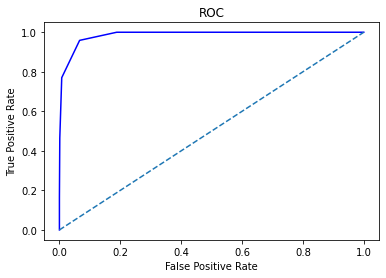

In [228]:
# ROC, AUC for Training Data
knn_train_fpr, knn_train_tpr,_=roc_curve(y_train,knn_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr,knn_train_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_train_auc=roc_auc_score(y_train,knn_model.predict(X_train))
print('Area under Curve is', knn_train_auc)

In [229]:
## Performance metrics on test data set
knn_test_predict = knn_model.predict(X_test)
knn_test_score = knn_model.score(X_test, y_test)
print(knn_test_score)
print(confusion_matrix(y_test, knn_test_predict))
print(classification_report(y_test, knn_test_predict))

0.8969804618117229
[[1357   41]
 [ 133  158]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1398
           1       0.79      0.54      0.64       291

    accuracy                           0.90      1689
   macro avg       0.85      0.76      0.79      1689
weighted avg       0.89      0.90      0.89      1689



Area under Curve is 0.7568138577939029


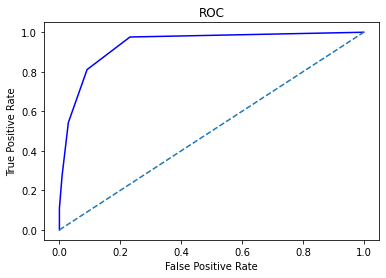

In [230]:
# ROC, AUC for Test Data
knn_test_fpr, knn_test_tpr,_=roc_curve(y_test,knn_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr,knn_test_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_test_auc=roc_auc_score(y_test,knn_model.predict(X_test))
print('Area under Curve is', knn_test_auc)

### Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

In [233]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [234]:
## Performance metrics on train data set
nb_train_predict = nb_model.predict(X_train)
nb_train_score = nb_model.score(X_train, y_train)
print(nb_train_score)
print(confusion_matrix(y_train, nb_train_predict))
print(classification_report(y_train, nb_train_predict))

0.748540979446841
[[2449  835]
 [ 156  501]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      3284
           1       0.38      0.76      0.50       657

    accuracy                           0.75      3941
   macro avg       0.66      0.75      0.67      3941
weighted avg       0.85      0.75      0.78      3941



Area under Curve is 0.7541469919187538


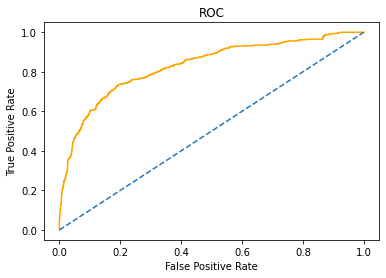

In [235]:
# ROC, AUC for Training Data
nb_train_fpr, nb_train_tpr,_=roc_curve(y_train,nb_model.predict_proba(X_train)[:,1])
plt.plot(nb_train_fpr,nb_train_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nb_train_auc=roc_auc_score(y_train,nb_model.predict(X_train))
print('Area under Curve is', nb_train_auc)

In [236]:
## Performance metrics on test data set
nb_test_predict = nb_model.predict(X_test)
nb_test_score = nb_model.score(X_test, y_test)
print(nb_test_score)
print(confusion_matrix(y_test, nb_test_predict))
print(classification_report(y_test, nb_test_predict))

0.7282415630550622
[[1019  379]
 [  80  211]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1398
           1       0.36      0.73      0.48       291

    accuracy                           0.73      1689
   macro avg       0.64      0.73      0.65      1689
weighted avg       0.83      0.73      0.76      1689



Area under Curve is 0.72699216848812


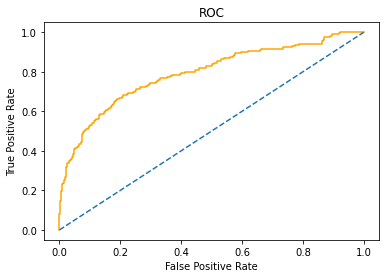

In [237]:
# ROC, AUC for Test Data
nb_test_fpr, nb_test_tpr,_=roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(nb_test_fpr,nb_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nb_test_auc=roc_auc_score(y_test,nb_model.predict(X_test))
print('Area under Curve is', nb_test_auc)

### SVM

In [239]:
from sklearn import svm

In [240]:
# we use scaled data for SVM
svm_model= svm.SVC(random_state=1, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [241]:
## Performance metrics on train data set
svm_train_predict = svm_model.predict(X_train)
svm_train_score = svm_model.score(X_train, y_train)
print(svm_train_score)
print(confusion_matrix(y_train, svm_train_predict))
print(classification_report(y_train, svm_train_predict))

0.9248921593504187
[[3243   41]
 [ 255  402]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3284
           1       0.91      0.61      0.73       657

    accuracy                           0.92      3941
   macro avg       0.92      0.80      0.84      3941
weighted avg       0.92      0.92      0.92      3941



Area under Curve is 0.7996936857268395


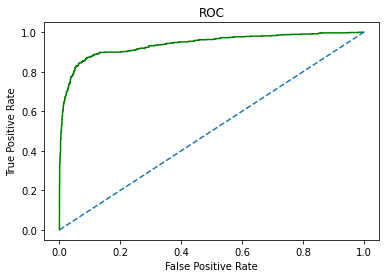

In [242]:
# ROC, AUC for Training Data
svm_train_fpr, svm_train_tpr,_=roc_curve(y_train,svm_model.predict_proba(X_train)[:,1])
plt.plot(svm_train_fpr,svm_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_train_auc=roc_auc_score(y_train,svm_model.predict(X_train))
print('Area under Curve is', svm_train_auc)

In [243]:
## Performance metrics on test data set
svm_test_predict = svm_model.predict(X_test)
svm_test_score = svm_model.score(X_test, y_test)
print(svm_test_score)
print(confusion_matrix(y_test, svm_test_predict))
print(classification_report(y_test, svm_test_predict))

0.9076376554174067
[[1377   21]
 [ 135  156]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1398
           1       0.88      0.54      0.67       291

    accuracy                           0.91      1689
   macro avg       0.90      0.76      0.81      1689
weighted avg       0.91      0.91      0.90      1689



Area under Curve is 0.7605305074996681


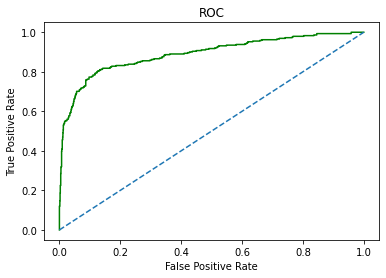

In [244]:
# ROC, AUC for Test Data
svm_test_fpr, svm_test_tpr,_=roc_curve(y_test,svm_model.predict_proba(X_test)[:,1])
plt.plot(svm_test_fpr,svm_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_test_auc=roc_auc_score(y_test, svm_model.predict(X_test))
print('Area under Curve is', svm_test_auc)

### Decision Tree

In [246]:
from sklearn import tree

In [247]:
dt_model= tree.DecisionTreeClassifier(random_state=7)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [249]:
## Performance Matrix on train data set
dt_train_predict = dt_model.predict(X_train)
dt_model_score = dt_model.score(X_train, y_train)
print(dt_model_score)
print(confusion_matrix(y_train, dt_train_predict))
print(classification_report(y_train, dt_train_predict))

1.0
[[3284    0]
 [   0  657]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3284
           1       1.00      1.00      1.00       657

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [250]:
## Performance Matrix on test data set
dt_test_predict = dt_model.predict(X_test)
dt_test_model_score = dt_model.score(X_test, y_test)
print(dt_test_model_score)
print(confusion_matrix(y_test, dt_test_predict))
print(classification_report(y_test, dt_test_predict))

0.9236234458259325
[[1318   80]
 [  49  242]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1398
           1       0.75      0.83      0.79       291

    accuracy                           0.92      1689
   macro avg       0.86      0.89      0.87      1689
weighted avg       0.93      0.92      0.93      1689



**Let's regularize the tree:**

In [254]:
reg_dt_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf=10, min_samples_split=30)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [255]:
## Performance Matrix on train data set
reg_dt_train_predict = reg_dt_model.predict(X_train)
reg_dt_train_score = reg_dt_model.score(X_train, y_train)
print(reg_dt_train_score)
print(confusion_matrix(y_train, reg_dt_train_predict))
print(classification_report(y_train, reg_dt_train_predict))

0.9264146155798021
[[3195   89]
 [ 201  456]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3284
           1       0.84      0.69      0.76       657

    accuracy                           0.93      3941
   macro avg       0.89      0.83      0.86      3941
weighted avg       0.92      0.93      0.92      3941



Area under Curve is 0.8334814153582611


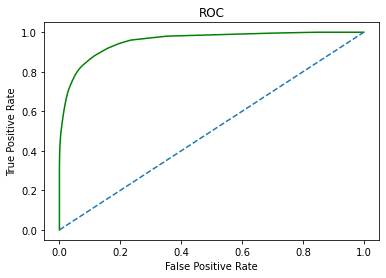

In [258]:
# ROC, AUC for Training Data
reg_dt_train_fpr, reg_dt_train_tpr,_=roc_curve(y_train, reg_dt_model.predict_proba(X_train)[:,1])
plt.plot(reg_dt_train_fpr, reg_dt_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
reg_dt_train_auc=roc_auc_score(y_train, reg_dt_model.predict(X_train))
print('Area under Curve is', reg_dt_train_auc)

In [256]:
## Performance Matrix on test data set
reg_dt_test_predict = reg_dt_model.predict(X_test)
reg_dt_test_score = reg_dt_model.score(X_test, y_test)
print(reg_dt_test_score)
print(confusion_matrix(y_test, reg_dt_test_predict))
print(classification_report(y_test, reg_dt_test_predict))

0.8845470692717584
[[1328   70]
 [ 125  166]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1398
           1       0.70      0.57      0.63       291

    accuracy                           0.88      1689
   macro avg       0.81      0.76      0.78      1689
weighted avg       0.88      0.88      0.88      1689



Area under Curve is 0.7601876023184815


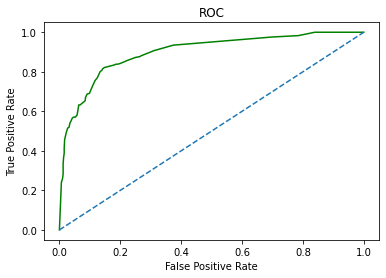

In [259]:
# ROC, AUC for Test Data
reg_dt_test_fpr, reg_dt_test_tpr,_=roc_curve(y_test, reg_dt_model.predict_proba(X_test)[:,1])
plt.plot(reg_dt_test_fpr,reg_dt_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
reg_dt_test_auc=roc_auc_score(y_test, reg_dt_model.predict(X_test))
print('Area under Curve is', reg_dt_test_auc)

In [358]:
pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)

,Imp
Tenure,0.483912
NumberOfAddress,0.083992
DaySinceLastOrder,0.081667
Complain,0.079211
WarehouseToHome,0.075043
SatisfactionScore,0.041741
NumberOfDeviceRegistered,0.028939
OrderAmountHikeFromlastYear,0.020733
PreferredLoginDevice_Mobile Phone,0.019846
PreferredPaymentMode_E wallet,0.018361


### Artificial Neural Network

In [260]:
from sklearn.neural_network import MLPClassifier

In [274]:
ann_mlp_model = MLPClassifier()
ann_mlp_model.fit(X_train, y_train)

MLPClassifier()

In [275]:
## Performance metrics on train data set
ann_train_predict = ann_mlp_model.predict(X_train)
ann_train_score = ann_mlp_model.score(X_train, y_train)
print(ann_train_score)
print(confusion_matrix(y_train, ann_train_predict))
print(classification_report(y_train, ann_train_predict))

0.9901040345090079
[[3270   14]
 [  25  632]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3284
           1       0.98      0.96      0.97       657

    accuracy                           0.99      3941
   macro avg       0.99      0.98      0.98      3941
weighted avg       0.99      0.99      0.99      3941



Area under Curve is 0.9788425779157096


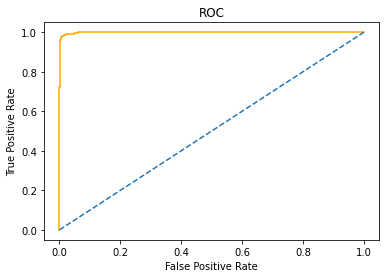

In [276]:
# ROC, AUC for Training Data
ann_train_fpr, ann_train_tpr,_=roc_curve(y_train,ann_mlp_model.predict_proba(X_train)[:,1])
plt.plot(ann_train_fpr,ann_train_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_train_auc=roc_auc_score(y_train,ann_mlp_model.predict(X_train))
print('Area under Curve is', ann_train_auc)

In [277]:
## Performance metrics on test data set
ann_test_predict = ann_mlp_model.predict(X_test)
ann_test_score = ann_mlp_model.score(X_test, y_test)
print(ann_test_score)
print(confusion_matrix(y_test, ann_test_predict))
print(classification_report(y_test, ann_test_predict))

0.9437537004144464
[[1363   35]
 [  60  231]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1398
           1       0.87      0.79      0.83       291

    accuracy                           0.94      1689
   macro avg       0.91      0.88      0.90      1689
weighted avg       0.94      0.94      0.94      1689



Area under Curve is 0.8843893338052888


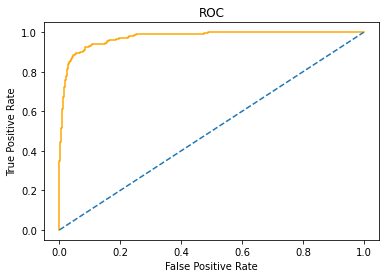

In [278]:
# ROC, AUC for Test Data
ann_test_fpr, ann_test_tpr,_=roc_curve(y_test, ann_mlp_model.predict_proba(X_test)[:,1])
plt.plot(ann_test_fpr,ann_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_test_auc=roc_auc_score(y_test,ann_mlp_model.predict(X_test))
print('Area under Curve is', ann_test_auc)

<h3>MODEL TUNING, BAGGING, BOOSTING</h3>

In [464]:
## We will be using GridSearchCV extensively in this section to tune our models

In [280]:
from sklearn.model_selection import GridSearchCV

### SVM Tuning

In [295]:
param_grid = {'C': [1.5, 1.8, 2],  
              'gamma': [0.1, 0.11, 0.12, 0.13], 
              'kernel': ['rbf'], 
              'class_weight': ['balanced', 'none']} 

svmcl = svm.SVC(probability=True)

svm_grid_search = GridSearchCV(estimator = svmcl, param_grid = param_grid, cv = 5)

In [296]:
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1.5, 1.8, 2],
                         'class_weight': ['balanced', 'none'],
                         'gamma': [0.1, 0.11, 0.12, 0.13], 'kernel': ['rbf']})

In [297]:
svm_grid_search.best_params_

{'C': 2, 'class_weight': 'balanced', 'gamma': 0.13, 'kernel': 'rbf'}

In [298]:
best_grid_svm = svm_grid_search.best_estimator_

In [299]:
train_pred_svmg = best_grid_svm.predict(X_train)
test_pred_svmg = best_grid_svm.predict(X_test)

In [300]:
print(confusion_matrix(y_train, train_pred_svmg))

[[3211   73]
 [   0  657]]


In [301]:
print(classification_report(y_train,train_pred_svmg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3284
           1       0.90      1.00      0.95       657

    accuracy                           0.98      3941
   macro avg       0.95      0.99      0.97      3941
weighted avg       0.98      0.98      0.98      3941



Area under Curve is 0.9888855054811206


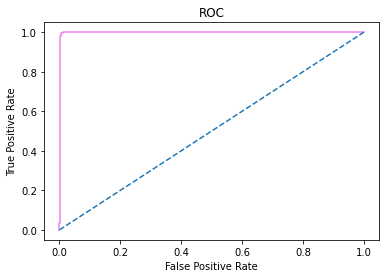

In [302]:
# ROC, AUC for Training Data
svmg_train_fpr, svmg_train_tpr,_=roc_curve(y_train,best_grid_svm.predict_proba(X_train)[:,1])
plt.plot(svmg_train_fpr,svmg_train_tpr,color='violet')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svmg_train_auc=roc_auc_score(y_train,best_grid_svm.predict(X_train))
print('Area under Curve is', svmg_train_auc)

In [303]:
print(confusion_matrix(y_test, test_pred_svmg))

[[1330   68]
 [  26  265]]


In [304]:
print(classification_report(y_test,test_pred_svmg))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1398
           1       0.80      0.91      0.85       291

    accuracy                           0.94      1689
   macro avg       0.89      0.93      0.91      1689
weighted avg       0.95      0.94      0.95      1689



Area under Curve is 0.9310060026842469


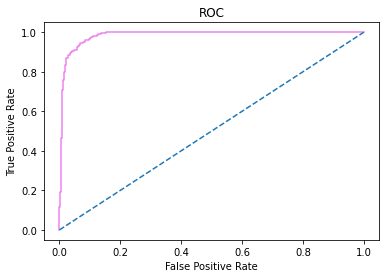

In [305]:
# ROC, AUC for Test Data
svmg_test_fpr, svmg_test_tpr,_=roc_curve(y_test,best_grid_svm.predict_proba(X_test)[:,1])
plt.plot(svmg_test_fpr,svmg_test_tpr,color='violet')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svmg_test_auc=roc_auc_score(y_test, best_grid_svm.predict(X_test))
print('Area under Curve is', svmg_test_auc)

### Logistic Regression - Tuned

In [ ]:
## Logit with hyper parameter class_weight='balanced'

In [206]:
bal_log_model = LogisticRegression(class_weight='balanced')
bal_log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [207]:
## Prediction and performance metrics on train data set
bal_log_train_predict = bal_log_model.predict(X_train)
bal_log_train_score = bal_log_model.score(X_train, y_train)
print(bal_log_train_score)
print(confusion_matrix(y_train, bal_log_train_predict))
print(classification_report(y_train, bal_log_train_predict))


0.8251712763258057
[[2690  594]
 [  95  562]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3284
           1       0.49      0.86      0.62       657

    accuracy                           0.83      3941
   macro avg       0.73      0.84      0.75      3941
weighted avg       0.89      0.83      0.84      3941



Area under Curve is 0.8372631846302444


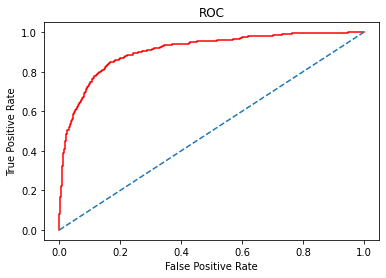

In [208]:
# ROC, AUC for Training Data
bal_log_train_fpr, bal_log_train_tpr,_=roc_curve(y_train, bal_log_model.predict_proba(X_train)[:,1])
plt.plot(bal_log_train_fpr,bal_log_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bal_log_train_auc=roc_auc_score(y_train,bal_log_model.predict(X_train))
print('Area under Curve is', bal_log_train_auc)

In [209]:
## Prediction and performance metrics on test data set
bal_log_test_predict = bal_log_model.predict(X_test)
bal_log_test_score = bal_log_model.score(X_test, y_test)
print(bal_log_test_score)
print(confusion_matrix(y_test, bal_log_test_predict))
print(classification_report(y_test, bal_log_test_predict))


0.8099467140319716
[[1135  263]
 [  58  233]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1398
           1       0.47      0.80      0.59       291

    accuracy                           0.81      1689
   macro avg       0.71      0.81      0.73      1689
weighted avg       0.87      0.81      0.83      1689



Area under Curve is 0.8062806955444448


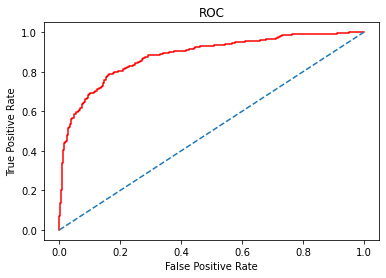

In [210]:
# ROC, AUC for Test Data
bal_log_test_fpr, bal_log_test_tpr,_=roc_curve(y_test, bal_log_model.predict_proba(X_test)[:,1])
plt.plot(bal_log_test_fpr,bal_log_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bal_log_test_auc=roc_auc_score(y_test, bal_log_model.predict(X_test))
print('Area under Curve is', bal_log_test_auc)

In [602]:
n=0
for column in X_train.columns:
    print(column,': ', '%f' %bal_log_model.coef_[0,n])
    n=n+1

Tenure :  -1.688991
WarehouseToHome :  0.384214
HourSpendOnApp :  -0.020863
NumberOfDeviceRegistered :  0.351374
SatisfactionScore :  0.291142
NumberOfAddress :  0.681005
Complain :  1.704922
OrderAmountHikeFromlastYear :  -0.084531
CouponUsed :  0.120013
OrderCount :  0.499589
DaySinceLastOrder :  -0.466638
CashbackAmount :  -0.786738
PreferredLoginDevice_Mobile Phone :  -0.391424
CityTier_2 :  0.636433
CityTier_3 :  0.639022
PreferredPaymentMode_Credit Card :  -0.888429
PreferredPaymentMode_Debit Card :  -0.831078
PreferredPaymentMode_E wallet :  -0.168718
PreferredPaymentMode_UPI :  -0.890345
Gender_Male :  0.342282
PreferedOrderCat_Grocery :  0.087477
PreferedOrderCat_Laptop & Accessory :  -1.744276
PreferedOrderCat_Mobile Phone :  -0.840220
PreferedOrderCat_Others :  1.934439
MaritalStatus_Married :  -0.437158
MaritalStatus_Single :  0.543259


### Artificial Neural Network - with tuning using GridSearchCV

In [442]:
param_grid = {'hidden_layer_sizes': [(50,150,50),(200,),(100,100)],
              'activation': ['relu'],
              'solver': ['adam'],
              'alpha': [0.0001, 0.001, 0.05]}

anncl = MLPClassifier(max_iter=100)

ann_grid_search = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 5)

In [443]:
ann_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.001, 0.05],
                         'hidden_layer_sizes': [(50, 150, 50), (200,),
                                                (100, 100)],
                         'solver': ['adam']})

In [444]:
ann_grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [445]:
best_grid_ann = ann_grid_search.best_estimator_

In [446]:
train_pred_anng = best_grid_ann.predict(X_train)
test_pred_anng = best_grid_ann.predict(X_test)

In [447]:
print(classification_report(y_train,train_pred_anng))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3284
           1       1.00      1.00      1.00       657

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [448]:
print(confusion_matrix(y_train,train_pred_anng))

[[3284    0]
 [   0  657]]


Area under Curve is 1.0


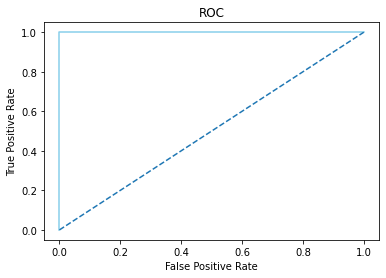

In [449]:
# ROC, AUC for Training Data
anng_train_fpr, anng_train_tpr,_=roc_curve(y_train,best_grid_ann.predict_proba(X_train)[:,1])
plt.plot(anng_train_fpr,anng_train_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
anng_train_auc=roc_auc_score(y_train,best_grid_ann.predict(X_train))
print('Area under Curve is', anng_train_auc)

In [450]:
print(classification_report(y_test,test_pred_anng))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1398
           1       0.93      0.85      0.89       291

    accuracy                           0.96      1689
   macro avg       0.95      0.92      0.93      1689
weighted avg       0.96      0.96      0.96      1689



In [451]:
print(confusion_matrix(y_test,test_pred_anng))

[[1380   18]
 [  44  247]]


Area under Curve is 0.9179608571892099


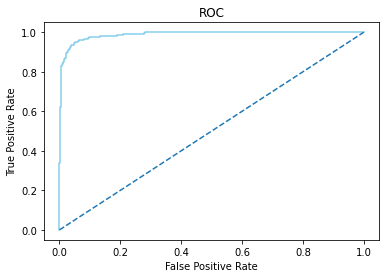

In [452]:
anng_test_fpr, anng_test_tpr,_=roc_curve(y_test,best_grid_ann.predict_proba(X_test)[:,1])
plt.plot(anng_test_fpr,anng_test_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
anng_test_auc=roc_auc_score(y_test,best_grid_ann.predict(X_test))
print('Area under Curve is', anng_test_auc)

### BAGGING

In [92]:
## RANDOM FOREST with Model Tuning using GridSearchCV

In [93]:
#Import Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [306]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [5,10],
    'min_samples_leaf': [20,40],
    'min_samples_split': [60,120],
    'n_estimators': [501], 
    'class_weight':['balanced','none']
}

rfcl = RandomForestClassifier(random_state=1)

rf_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [307]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'none'],
                         'max_depth': [7, 10], 'max_features': [5, 10],
                         'min_samples_leaf': [20, 40],
                         'min_samples_split': [60, 120],
                         'n_estimators': [501]})

In [308]:
rf_grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 501}

In [309]:
best_grid_rf = rf_grid_search.best_estimator_

In [310]:
train_pred_rfg = best_grid_rf.predict(X_train)
test_pred_rfg = best_grid_rf.predict(X_test)

In [311]:
print(confusion_matrix(y_train,train_pred_rfg))

[[2864  420]
 [  85  572]]


In [312]:
print(classification_report(y_train,train_pred_rfg))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3284
           1       0.58      0.87      0.69       657

    accuracy                           0.87      3941
   macro avg       0.77      0.87      0.81      3941
weighted avg       0.91      0.87      0.88      3941



In [313]:
accuracy_score(y_train,train_pred_rfg)

0.8718599340268968

Area under Curve is 0.8713656175321702


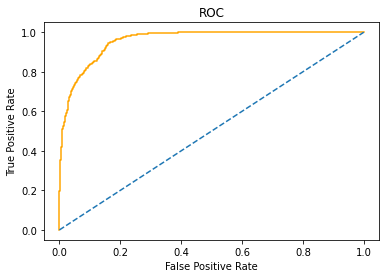

In [314]:
# ROC, AUC for Training Data
rfg_train_fpr, rfg_train_tpr,_=roc_curve(y_train,best_grid_rf.predict_proba(X_train)[:,1])
plt.plot(rfg_train_fpr,rfg_train_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfg_train_auc=roc_auc_score(y_train,best_grid_rf.predict(X_train))
print('Area under Curve is', rfg_train_auc)

In [315]:
print(confusion_matrix(y_test, test_pred_rfg))

[[1183  215]
 [  55  236]]


In [316]:
print(classification_report(y_test,test_pred_rfg))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1398
           1       0.52      0.81      0.64       291

    accuracy                           0.84      1689
   macro avg       0.74      0.83      0.77      1689
weighted avg       0.88      0.84      0.85      1689



In [317]:
accuracy_score(y_test,test_pred_rfg)

0.8401420959147424

Area under Curve is 0.8286027166939516


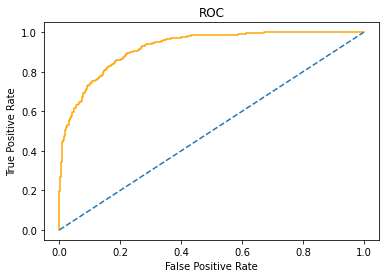

In [318]:
# ROC, AUC for Test Data
rfg_test_fpr, rfg_test_tpr,_=roc_curve(y_test,best_grid_rf.predict_proba(X_test)[:,1])
plt.plot(rfg_test_fpr,rfg_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfg_test_auc=roc_auc_score(y_test, best_grid_rf.predict(X_test))
print('Area under Curve is', rfg_test_auc)

In [319]:
## important features for the RF classifier

In [320]:
best_grid_rf.feature_importances_

array([5.27242096e-01, 3.05783925e-02, 2.32597687e-03, 1.02349073e-02,
       3.15294034e-02, 3.68870111e-02, 1.02257278e-01, 1.60656288e-02,
       1.74836177e-02, 1.11883574e-02, 3.20117305e-02, 5.32371799e-02,
       3.90371289e-03, 3.83228694e-04, 1.65461940e-02, 8.48512318e-03,
       4.67501240e-03, 3.34772704e-03, 2.11355113e-04, 4.80864509e-03,
       7.08694415e-04, 1.25619127e-02, 3.78920591e-02, 2.13749170e-04,
       1.16856280e-02, 2.35353783e-02])

In [321]:
pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)

,Imp
Tenure,0.527242
Complain,0.102257
CashbackAmount,0.053237
PreferedOrderCat_Mobile Phone,0.037892
NumberOfAddress,0.036887
DaySinceLastOrder,0.032012
SatisfactionScore,0.031529
WarehouseToHome,0.030578
MaritalStatus_Single,0.023535
CouponUsed,0.017484


### BOOSTING

In [465]:
## XGBOOST

In [335]:
import xgboost as xgb

In [336]:
xgb_model=xgb.XGBClassifier(random_state=1, colsample_bytree=0.8, scale_pos_weight=5)

In [337]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, random_state=1, scale_pos_weight=5)

In [338]:
# performance metrics for training data
xgb_train_predict =xgb_model.predict(X_train)
xgb_train_score = xgb_model.score(X_train,y_train)
print(xgb_train_score)
print(confusion_matrix(y_train,xgb_train_predict))
print(classification_report(y_train, xgb_train_predict))

0.8985029180411063
[[2940  344]
 [  56  601]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3284
           1       0.64      0.91      0.75       657

    accuracy                           0.90      3941
   macro avg       0.81      0.91      0.84      3941
weighted avg       0.92      0.90      0.91      3941



Area under Curve is 0.905006887320471


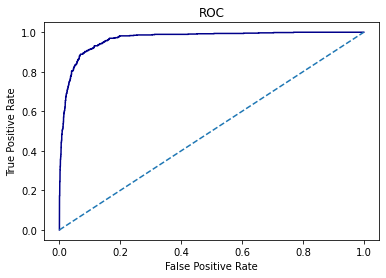

In [339]:
# ROC AUC curve for training data
xgb_train_fpr, xgb_train_tpr,_=roc_curve(y_train,xgb_model.predict_proba(X_train)[:,1])
plt.plot(xgb_train_fpr,xgb_train_tpr,color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_train_auc=roc_auc_score(y_train,xgb_model.predict(X_train))
print('Area under Curve is', xgb_train_auc)

In [340]:
# Performance metrics on test data
xgb_test_predict = xgb_model.predict(X_test)
xgb_test_score = xgb_model.score(X_test,y_test)
print(xgb_test_score)
print(confusion_matrix(y_test,xgb_test_predict))
print(classification_report(y_test, xgb_test_predict))

0.8673771462403789
[[1222  176]
 [  48  243]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      1398
           1       0.58      0.84      0.68       291

    accuracy                           0.87      1689
   macro avg       0.77      0.85      0.80      1689
weighted avg       0.90      0.87      0.88      1689



Area under Curve is 0.8545787059569636


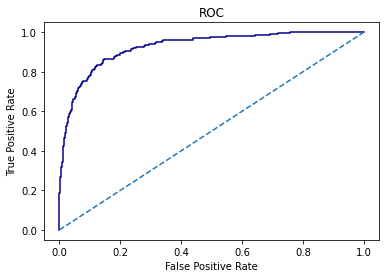

In [341]:
# ROC AUC curve for test data
xgb_test_fpr, xgb_test_tpr,_=roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.plot(xgb_test_fpr,xgb_test_tpr,color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_test_auc=roc_auc_score(y_test,xgb_model.predict(X_test))
print('Area under Curve is', xgb_test_auc)

#### XGBOOST with Model Tuning using GridSearchCV

In [453]:
param_grid = {"learning_rate": [0.05, 0.10, 0.15, 0.20],
              "max_depth": [ 3, 5, 7],
              "min_child_weight": [ 1, 2, 3],
              "gamma": [ 0.0, 0.1, 0.2],
              "colsample_bytree": [0.5 , 0.7, 0.8] }


xgbcl = xgb.XGBClassifier(random_state=1, scale_pos_weight=5)

xgb_grid_search = GridSearchCV(estimator = xgbcl, param_grid = param_grid, cv = 5)

In [454]:
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=1, scale_pos_weight=5),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.8],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 2, 3]})

In [455]:
xgb_grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1}

In [456]:
best_grid_xgb = xgb_grid_search.best_estimator_

In [457]:
train_pred_xgbg = best_grid_xgb.predict(X_train)
test_pred_xgbg = best_grid_xgb.predict(X_test)

In [458]:
print(classification_report(y_train,train_pred_xgbg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3284
           1       1.00      1.00      1.00       657

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [459]:
print(confusion_matrix(y_train,train_pred_xgbg))

[[3284    0]
 [   0  657]]


Area under Curve is 1.0


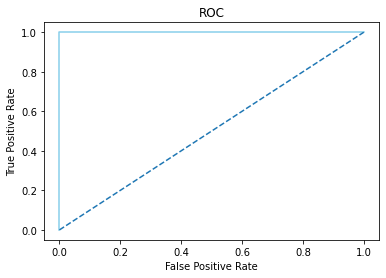

In [460]:
# ROC, AUC for Training Data
xgbg_train_fpr, xgbg_train_tpr,_=roc_curve(y_train,best_grid_xgb.predict_proba(X_train)[:,1])
plt.plot(xgbg_train_fpr,xgbg_train_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgbg_train_auc=roc_auc_score(y_train,best_grid_xgb.predict(X_train))
print('Area under Curve is', xgbg_train_auc)

In [461]:
print(classification_report(y_test,test_pred_xgbg))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1398
           1       0.88      0.89      0.89       291

    accuracy                           0.96      1689
   macro avg       0.93      0.93      0.93      1689
weighted avg       0.96      0.96      0.96      1689



In [462]:
print(confusion_matrix(y_test,test_pred_xgbg))

[[1364   34]
 [  31  260]]


Area under Curve is 0.934575166290577


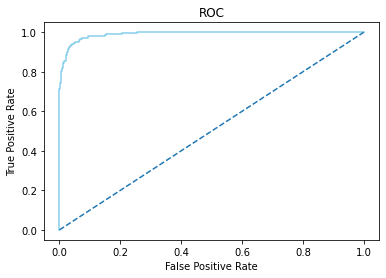

In [463]:
xgbg_test_fpr, xgbg_test_tpr,_=roc_curve(y_test,best_grid_xgb.predict_proba(X_test)[:,1])
plt.plot(xgbg_test_fpr,xgbg_test_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgbg_test_auc=roc_auc_score(y_test,best_grid_xgb.predict(X_test))
print('Area under Curve is', xgbg_test_auc)

In [488]:
best_grid_xgb.feature_importances_

array([0.09295172, 0.02218435, 0.01470535, 0.0258528 , 0.02730402,
       0.02210558, 0.15188909, 0.02051443, 0.01862785, 0.02059034,
       0.02387954, 0.02134088, 0.02169556, 0.01615301, 0.02251785,
       0.02821638, 0.02402828, 0.0229976 , 0.02133356, 0.01753525,
       0.12888017, 0.0445646 , 0.05741406, 0.05197056, 0.03783798,
       0.0429092 ], dtype=float32)

In [491]:
pd.DataFrame(best_grid_xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)

,Imp
Complain,0.151889
PreferedOrderCat_Grocery,0.128880
Tenure,0.092952
PreferedOrderCat_Mobile Phone,0.057414
PreferedOrderCat_Others,0.051971
PreferedOrderCat_Laptop & Accessory,0.044565
MaritalStatus_Single,0.042909
MaritalStatus_Married,0.037838
PreferredPaymentMode_Credit Card,0.028216
SatisfactionScore,0.027304


In [603]:
imp_df = pd.DataFrame(best_grid_xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)

<Figure size 1080x504 with 0 Axes>

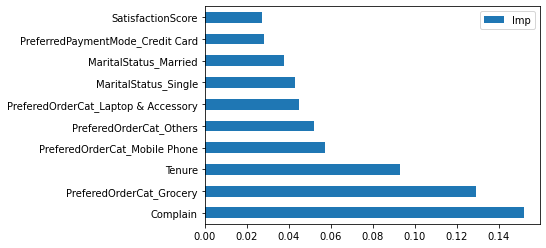

In [606]:
plt.figure(figsize=(15,7))
imp_df[0:10].plot(kind='barh',)

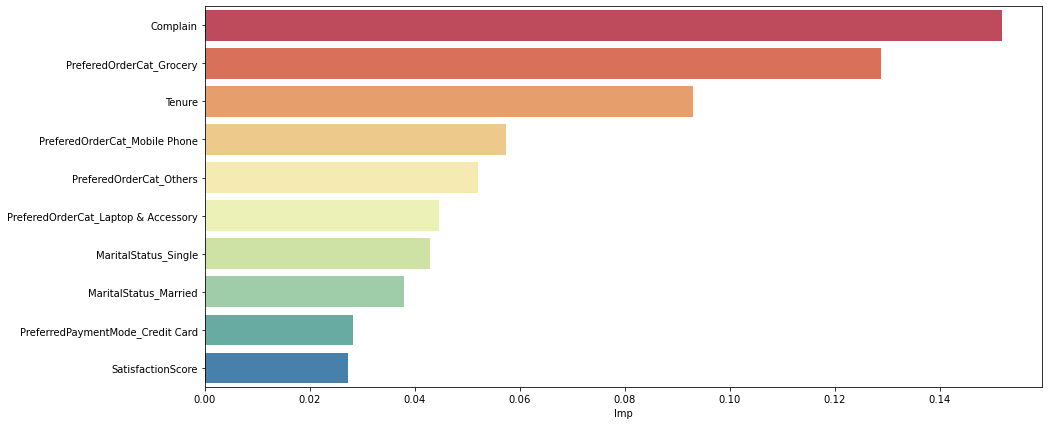

In [619]:
plt.figure(figsize=(15,7))
sns.barplot(x=imp_df[0:10].Imp,y=imp_df[0:10].index, palette='Spectral')

## SMOTE 

In [158]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [159]:
sm = SMOTE(random_state=7)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [160]:
## Let's check the shape after SMOTE
X_train_res.shape


(6568, 26)

In [161]:
X_test.shape

(1689, 26)

Array versions:

In [163]:
XX_test = X_test.to_numpy()

In [164]:
yy_test = y_test.to_numpy()

####  Instead of class_weight, using SMOTE and assess - does it help better the performance for RF, SVM and XGB? Use GridSearchCV


### RF SMOTE

In [389]:
param_grid = {
    'max_depth': [5,7],
    'max_features': [5,7],
    'min_samples_leaf': [30, 50],
    'min_samples_split': [90, 150],
    'n_estimators': [501]}

rfcl_sm = RandomForestClassifier(random_state=1)

rfsm_grid_search = GridSearchCV(estimator = rfcl_sm, param_grid = param_grid, cv = 5)

In [390]:
rfsm_grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7], 'max_features': [5, 7],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [90, 150],
                         'n_estimators': [501]})

In [391]:
rfsm_grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 501}

In [392]:
best_grid_rfsm = rfsm_grid_search.best_estimator_

In [393]:
train_pred_rfgsm = best_grid_rfsm.predict(X_train_res)
test_pred_rfgsm = best_grid_rfsm.predict(X_test)

In [394]:
train_pred_rfgsm

array([0, 0, 0, ..., 1, 1, 1])

In [395]:
print(confusion_matrix(y_train_res,train_pred_rfgsm))

[[2952  332]
 [ 356 2928]]


In [396]:
print(classification_report(y_train_res,train_pred_rfgsm))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3284
           1       0.90      0.89      0.89      3284

    accuracy                           0.90      6568
   macro avg       0.90      0.90      0.90      6568
weighted avg       0.90      0.90      0.90      6568



In [397]:
accuracy_score(y_train_res,train_pred_rfgsm)

0.8952496954933008

Area under Curve is 0.8952496954933009


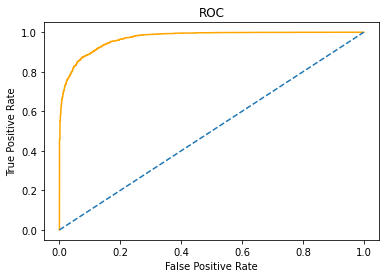

In [398]:
# ROC, AUC for Training Data
rfgsm_train_fpr, rfgsm_train_tpr,_=roc_curve(y_train_res,best_grid_rfsm.predict_proba(X_train_res)[:,1])
plt.plot(rfgsm_train_fpr,rfgsm_train_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfgsm_train_auc=roc_auc_score(y_train_res,best_grid_rfsm.predict(X_train_res))
print('Area under Curve is', rfgsm_train_auc)

In [399]:
print(confusion_matrix(y_test, test_pred_rfgsm))

[[797 601]
 [ 53 238]]


In [400]:
print(classification_report(y_test,test_pred_rfgsm))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1398
           1       0.28      0.82      0.42       291

    accuracy                           0.61      1689
   macro avg       0.61      0.69      0.57      1689
weighted avg       0.82      0.61      0.66      1689



In [401]:
accuracy_score(y_test,test_pred_rfgsm)

0.6127886323268206

Area under Curve is 0.6939847794345383


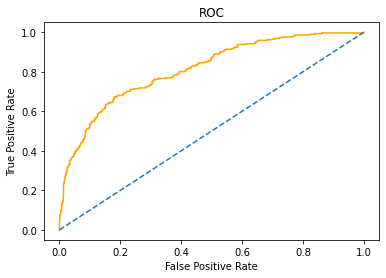

In [402]:
# ROC, AUC for Test Data
rfgsm_test_fpr, rfgsm_test_tpr,_=roc_curve(y_test,best_grid_rfsm.predict_proba(X_test)[:,1])
plt.plot(rfgsm_test_fpr,rfgsm_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfgsm_test_auc=roc_auc_score(y_test, best_grid_rfsm.predict(X_test))
print('Area under Curve is', rfgsm_test_auc)

### XGB SMOTE

In [403]:
param_grid = {'colsample_bytree': [0.6, 0.7, 0.8, 0.9], }

xgbclsm = xgb.XGBClassifier(random_state=7)

xgbsm_grid_search = GridSearchCV(estimator = xgbclsm, param_grid = param_grid, cv = 5)

In [404]:
xgbsm_grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=7),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9]})

In [405]:
xgbsm_grid_search.best_params_

{'colsample_bytree': 0.8}

In [406]:
best_grid_xgbsm = xgbsm_grid_search.best_estimator_

In [409]:
train_pred_xgbgsm = best_grid_xgbsm.predict(X_train_res)
test_pred_xgbgsm = best_grid_xgbsm.predict(XX_test)

In [410]:
print(classification_report(y_train_res,train_pred_xgbgsm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3284
           1       0.96      0.94      0.95      3284

    accuracy                           0.95      6568
   macro avg       0.95      0.95      0.95      6568
weighted avg       0.95      0.95      0.95      6568



In [411]:
print(confusion_matrix(y_train_res,train_pred_xgbgsm))

[[3144  140]
 [ 201 3083]]


Area under Curve is 0.9480816077953715


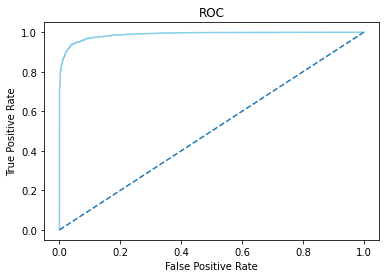

In [414]:
# ROC, AUC for Training Data
xgbgsm_train_fpr, xgbgsm_train_tpr,_=roc_curve(y_train_res,best_grid_xgbsm.predict_proba(X_train_res)[:,1])
plt.plot(xgbgsm_train_fpr,xgbgsm_train_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgbgsm_train_auc=roc_auc_score(y_train_res,best_grid_xgbsm.predict(X_train_res))
print('Area under Curve is', xgbgsm_train_auc)

In [412]:
print(classification_report(y_test,test_pred_xgbgsm))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1398
           1       0.70      0.67      0.69       291

    accuracy                           0.89      1689
   macro avg       0.82      0.81      0.81      1689
weighted avg       0.89      0.89      0.89      1689



In [413]:
print(confusion_matrix(y_test,test_pred_xgbgsm))

[[1313   85]
 [  95  196]]


Area under Curve is 0.806369187204106


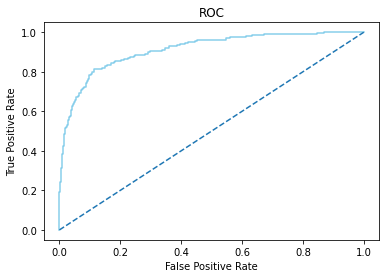

In [418]:
xgbgsm_test_fpr, xgbgsm_test_tpr,_=roc_curve(y_test,best_grid_xgbsm.predict_proba(XX_test)[:,1])
plt.plot(xgbgsm_test_fpr,xgbgsm_test_tpr,color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgbgsm_test_auc=roc_auc_score(y_test,best_grid_xgbsm.predict(XX_test))
print('Area under Curve is', xgbgsm_test_auc)

### LOGIT SMOTE

In [165]:
log_model_sm = LogisticRegression()
log_model_sm.fit(X_train_res, y_train_res)

LogisticRegression()

In [166]:
## Performance Matrix on train data set with SMOTE
smlog_train_predict = log_model_sm.predict(X_train_res)
smlog_train_score = log_model_sm.score(X_train_res, y_train_res)
print(smlog_train_score)
print(confusion_matrix(y_train_res, smlog_train_predict))
print(classification_report(y_train_res ,smlog_train_predict))

0.8456151035322778
[[2713  571]
 [ 443 2841]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3284
           1       0.83      0.87      0.85      3284

    accuracy                           0.85      6568
   macro avg       0.85      0.85      0.85      6568
weighted avg       0.85      0.85      0.85      6568



In [167]:
## Performance Matrix on test data set
smlog_test_predict = log_model_sm.predict(X_test)
smlog_test_score = log_model_sm.score(X_test, y_test)
print(smlog_test_score)
print(confusion_matrix(y_test, smlog_test_predict))
print(classification_report(y_test, smlog_test_predict))

0.8111308466548254
[[1139  259]
 [  60  231]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1398
           1       0.47      0.79      0.59       291

    accuracy                           0.81      1689
   macro avg       0.71      0.80      0.73      1689
weighted avg       0.87      0.81      0.83      1689



### LDA SMOTE

In [168]:
lda_model_sm = LinearDiscriminantAnalysis()
lda_model_sm.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [169]:
## Performance Matrix on train data set with SMOTE
smlda_train_predict = lda_model_sm.predict(X_train_res)
smlda_train_score = lda_model_sm.score(X_train_res, y_train_res)
print(smlda_train_score)
print(confusion_matrix(y_train_res, smlda_train_predict))
print(classification_report(y_train_res ,smlda_train_predict))

0.8407429963459196
[[2614  670]
 [ 376 2908]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3284
           1       0.81      0.89      0.85      3284

    accuracy                           0.84      6568
   macro avg       0.84      0.84      0.84      6568
weighted avg       0.84      0.84      0.84      6568



In [170]:
## Performance Matrix on test data set
smlda_test_predict = lda_model_sm.predict(X_test)
smlda_test_score = lda_model_sm.score(X_test, y_test)
print(smlda_test_score)
print(confusion_matrix(y_test, smlda_test_predict))
print(classification_report(y_test, smlda_test_predict))

0.7933688573120189
[[1104  294]
 [  55  236]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1398
           1       0.45      0.81      0.57       291

    accuracy                           0.79      1689
   macro avg       0.70      0.80      0.72      1689
weighted avg       0.87      0.79      0.81      1689



### Naive Bayes with SMOTE

In [127]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn import metrics

In [147]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.6399184581171238
[[2030  668]
 [1275 1423]]
              precision    recall  f1-score   support

           0       0.61      0.75      0.68      2698
           1       0.68      0.53      0.59      2698

    accuracy                           0.64      5396
   macro avg       0.65      0.64      0.64      5396
weighted avg       0.65      0.64      0.64      5396



In [130]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7179245283018868
[[674 224]
 [ 75  87]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       898
           1       0.28      0.54      0.37       162

    accuracy                           0.72      1060
   macro avg       0.59      0.64      0.59      1060
weighted avg       0.81      0.72      0.75      1060



### KNN SMOTE

In [134]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [135]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8615641215715345
[[1989  709]
 [  38 2660]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2698
           1       0.79      0.99      0.88      2698

    accuracy                           0.86      5396
   macro avg       0.89      0.86      0.86      5396
weighted avg       0.89      0.86      0.86      5396



In [136]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6047169811320755
[[557 341]
 [ 78  84]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       898
           1       0.20      0.52      0.29       162

    accuracy                           0.60      1060
   macro avg       0.54      0.57      0.51      1060
weighted avg       0.77      0.60      0.66      1060



### SVM with SMOTE

In [138]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1)
SVM_SM_model.fit(X_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [139]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(X_train_res)
model_score = SVM_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.7320237212750186
[[1837  861]
 [ 585 2113]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2698
           1       0.71      0.78      0.75      2698

    accuracy                           0.73      5396
   macro avg       0.73      0.73      0.73      5396
weighted avg       0.73      0.73      0.73      5396



In [140]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(X_test)
model_score = SVM_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6632075471698113
[[613 285]
 [ 72  90]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       898
           1       0.24      0.56      0.34       162

    accuracy                           0.66      1060
   macro avg       0.57      0.62      0.55      1060
weighted avg       0.79      0.66      0.71      1060



### CROSS VALIDATION 

In [484]:
## Concat scaled training and test sets for X and y

In [468]:
X_cv = pd.concat([X_train, X_test])

In [469]:
y_cv = pd.concat([y_train, y_test])

In [470]:
X_cv

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
200,-0.700757,-0.294588,-1.345919,0.303483,3,-0.871737,0,2.322970,0.721498,1.774954,...,1,0,0,0,0,0,0,0,0,0
4044,1.207802,1.937572,1.508138,0.303483,1,-0.482399,0,0.380802,-0.433896,-0.355748,...,1,0,0,1,0,0,1,0,0,1
572,-0.581472,1.317528,-1.345919,-0.682524,2,-0.871737,0,-0.174103,-1.011593,-0.710865,...,0,0,0,0,0,0,1,0,0,0
2850,-1.058612,1.317528,1.508138,0.303483,2,-0.482399,0,2.600422,-0.433896,-0.000631,...,0,0,0,1,0,0,1,0,0,0
734,-0.581472,0.697483,0.081110,1.289490,2,-1.261074,1,0.658255,-0.433896,-0.710865,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,-0.581472,-1.162650,-1.345919,-0.682524,5,-0.482399,0,1.768065,-0.433896,-0.710865,...,1,0,0,0,0,0,1,0,0,0
4938,1.207802,-0.046570,1.508138,1.289490,5,2.242963,1,2.322970,0.143801,-0.355748,...,1,0,0,0,0,1,0,0,1,0
5553,-1.058612,0.077439,0.081110,0.303483,1,-0.482399,0,-0.174103,0.143801,-0.355748,...,0,1,0,1,0,1,0,0,0,1
5462,-0.104333,1.813563,1.508138,2.275497,3,-0.871737,0,0.380802,-0.433896,-0.355748,...,0,0,0,1,0,0,1,0,1,0


In [471]:
y_cv

,Churn
200,0
4044,1
572,0
2850,0
734,0
...,...
898,0
4938,0
5553,0
5462,0


#### CROSS VALIDATION 

In [467]:
from sklearn.model_selection import cross_val_score

#### XGBoost

In [473]:
scores_xgb = cross_val_score(best_grid_xgb, X_cv, y_cv, cv=10)
scores_xgb

array([0.98401421, 0.99111901, 0.98401421, 0.98756661, 0.98756661,
       0.97690941, 0.98579041, 0.9982238 , 0.98223801, 0.98934281])

In [474]:
scores_xgb.mean()

0.986678507992895

In [475]:
scores_xgb.std()

0.005402098161898953

#### ANN

In [476]:
scores_ann = cross_val_score(best_grid_ann, X_cv, y_cv, cv=10)
scores_ann

array([0.98756661, 0.9982238 , 0.98223801, 0.97335702, 0.97335702,
       0.9928952 , 0.97513321, 0.99111901, 0.96625222, 0.97158082])

In [478]:
scores_ann.mean()

0.9811722912966253

In [480]:
scores_ann.std()

0.010209668108845413

#### SVM

In [481]:
scores_svm = cross_val_score(best_grid_svm, X_cv, y_cv, cv=10)
scores_svm

array([0.97690941, 0.97690941, 0.97158082, 0.96447602, 0.96980462,
       0.97335702, 0.96980462, 0.97513321, 0.95381883, 0.96447602])

In [482]:
scores_svm.mean()

0.969626998223801

In [483]:
scores_svm.std()

0.006761231371465101

Area under Curve for XGB is 0.934575166290577
Area under Curve for ANN is 0.9179608571892099
Area under Curve for SVM is 0.9310060026842469


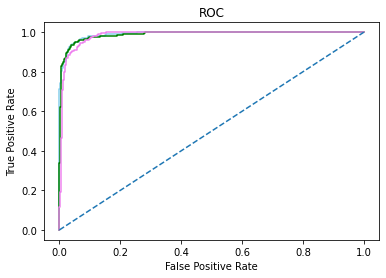

In [494]:
plt.plot(xgbg_test_fpr,xgbg_test_tpr,color='skyblue')
plt.plot(anng_test_fpr,anng_test_tpr,color='green')
plt.plot(svmg_test_fpr,svmg_test_tpr,color='violet')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

print('Area under Curve for XGB is', xgbg_test_auc)
print('Area under Curve for ANN is', anng_test_auc)
print('Area under Curve for SVM is', svmg_test_auc)

### POSTSCRIPT: DEEP LEARNING

In [499]:
X_train_tf = X_train.values

In [500]:
X_test_tf = X_test.values

In [501]:
y_train_tf = y_train.values

In [502]:
y_test_tf = y_test.values

In [503]:
## libraries
from tensorflow.keras.models import Sequential

In [504]:
from tensorflow.keras.layers import Dense

In [507]:
from tensorflow.keras.layers import Dropout

In [506]:
X_train.shape

(3941, 26)

In [505]:
tf_model = Sequential()

In [508]:
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dense(13, activation='relu'))

tf_model.add(Dense(1, activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [509]:
tf_model.fit(X_train_tf, y_train_tf, batch_size=256, epochs=400, validation_data=(X_test_tf, y_test_tf))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3941 samples, validate on 1689 samples
Epoch 1/400
3941/3941 [==============================] - 1s 294us/sample - loss: 0.4969 - val_loss: 0.4699
Epoch 2/400
3941/3941 [==============================] - 0s 57us/sample - loss: 0.4506 - val_loss: 0.4407
Epoch 3/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.4208 - val_loss: 0.4181
Epoch 4/400
3941/3941 [==============================] - 0s 46us/sample - loss: 0.3968 - val_loss: 0.4006
Epoch 5/400
3941/3941 [==============================] - 0s 19us/sample - loss: 0.3761 - val_loss: 0.3861
Epoch 6/400
3941/3941 [==============================] - 0s 36us/sample - loss: 0.3580 - val_loss: 0.3743
Epoch 7/400
3941/3941 [==============================] - 0s 28us/sample - loss: 0.3422 - val_loss: 0.3639
Epoch 8/400
3941/3941 [==============================] - 0s 36us/sample - loss: 0.3292 - val_loss: 0.3538
Epoch 9/400
3941/3941 [==============================] - 0s 32us/sample - loss: 0.3190 - val_loss: 0.34

Epoch 77/400
3941/3941 [==============================] - 0s 34us/sample - loss: 0.1008 - val_loss: 0.2238
Epoch 78/400
3941/3941 [==============================] - 0s 34us/sample - loss: 0.1002 - val_loss: 0.2219
Epoch 79/400
3941/3941 [==============================] - 0s 23us/sample - loss: 0.0978 - val_loss: 0.2186
Epoch 80/400
3941/3941 [==============================] - 0s 22us/sample - loss: 0.0966 - val_loss: 0.2199
Epoch 81/400
3941/3941 [==============================] - 0s 43us/sample - loss: 0.0953 - val_loss: 0.2223
Epoch 82/400
3941/3941 [==============================] - 0s 32us/sample - loss: 0.0934 - val_loss: 0.2286
Epoch 83/400
3941/3941 [==============================] - 0s 25us/sample - loss: 0.0936 - val_loss: 0.2192
Epoch 84/400
3941/3941 [==============================] - 0s 19us/sample - loss: 0.0896 - val_loss: 0.2173
Epoch 85/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.0897 - val_loss: 0.2158
Epoch 86/400
3941/3941 [=============

Epoch 153/400
3941/3941 [==============================] - 0s 36us/sample - loss: 0.0196 - val_loss: 0.2041
Epoch 154/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.0193 - val_loss: 0.2009
Epoch 155/400
3941/3941 [==============================] - 0s 26us/sample - loss: 0.0185 - val_loss: 0.2024
Epoch 156/400
3941/3941 [==============================] - 0s 18us/sample - loss: 0.0179 - val_loss: 0.2023
Epoch 157/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.0172 - val_loss: 0.2038
Epoch 158/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.0168 - val_loss: 0.2006
Epoch 159/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.0167 - val_loss: 0.2022
Epoch 160/400
3941/3941 [==============================] - 0s 47us/sample - loss: 0.0168 - val_loss: 0.2080
Epoch 161/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0164 - val_loss: 0.2052
Epoch 162/400
3941/3941 [===

Epoch 303/400
3941/3941 [==============================] - 0s 25us/sample - loss: 7.8988e-04 - val_loss: 0.2927
Epoch 304/400
3941/3941 [==============================] - 0s 39us/sample - loss: 7.9740e-04 - val_loss: 0.2918
Epoch 305/400
3941/3941 [==============================] - 0s 21us/sample - loss: 7.6224e-04 - val_loss: 0.2927
Epoch 306/400
3941/3941 [==============================] - 0s 26us/sample - loss: 7.2778e-04 - val_loss: 0.2912
Epoch 307/400
3941/3941 [==============================] - 0s 23us/sample - loss: 7.0213e-04 - val_loss: 0.2875
Epoch 308/400
3941/3941 [==============================] - 0s 24us/sample - loss: 6.8948e-04 - val_loss: 0.2939
Epoch 309/400
3941/3941 [==============================] - 0s 27us/sample - loss: 6.8172e-04 - val_loss: 0.2928
Epoch 310/400
3941/3941 [==============================] - 0s 19us/sample - loss: 6.7543e-04 - val_loss: 0.2948
Epoch 311/400
3941/3941 [==============================] - 0s 28us/sample - loss: 6.6968e-04 - val_loss:

In [510]:
tf_model.history.history

{'loss': [0.4969390046472508,
  0.45056299568432534,
  0.42078738116092773,
  0.3968260794522586,
  0.3760789823060228,
  0.35795714555885305,
  0.3422435558528895,
  0.3291510014448091,
  0.3189784248629611,
  0.30971854326235587,
  0.30194881175018695,
  0.29477268055107836,
  0.2869219918581956,
  0.28032866592214845,
  0.2742380162947252,
  0.26824874814861593,
  0.2630927299400539,
  0.25771291208763286,
  0.2534735888825005,
  0.2479397775376094,
  0.24359824479125353,
  0.2382600927558595,
  0.23678005153804343,
  0.23156153237689603,
  0.22761785408183724,
  0.2239864879953955,
  0.2218950732283349,
  0.2174089665689374,
  0.21364076418551176,
  0.21001599591052403,
  0.20628055594001315,
  0.20318419871007207,
  0.1985165244339384,
  0.19588442729817704,
  0.1936306234499247,
  0.19025300889715752,
  0.18696602688952468,
  0.18396039977877673,
  0.1804243197290766,
  0.17693894109018743,
  0.17500475345832145,
  0.17128704969228387,
  0.16976587749985503,
  0.16653337175169744

In [511]:
losses = pd.DataFrame(tf_model.history.history)

In [512]:
losses

,loss,val_loss
0,0.496939,0.469918
1,0.450563,0.440656
2,0.420787,0.418093
3,0.396826,0.400581
4,0.376079,0.386129
...,...,...
395,0.000204,0.337359
396,0.000200,0.334292
397,0.000210,0.341469
398,0.000201,0.339148


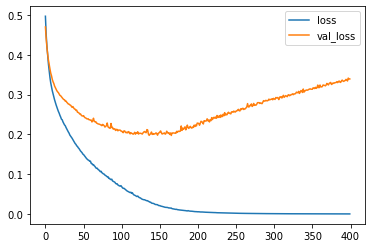

In [513]:
losses.plot()

In [514]:
## EARLYSTOP

In [515]:
from tensorflow.keras.callbacks import EarlyStopping

In [516]:
tf_model = Sequential()

In [517]:
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dense(13, activation='relu'))

tf_model.add(Dense(1, activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy', optimizer='adam')

In [518]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [519]:
tf_model.fit(X_train_tf, y_train_tf, batch_size=256, epochs=400, validation_data=(X_test_tf, y_test_tf),
            callbacks=[early_stop])

Train on 3941 samples, validate on 1689 samples
Epoch 1/400
3941/3941 [==============================] - 1s 158us/sample - loss: 0.5464 - val_loss: 0.4788
Epoch 2/400
3941/3941 [==============================] - 0s 65us/sample - loss: 0.4465 - val_loss: 0.4495
Epoch 3/400
3941/3941 [==============================] - 0s 20us/sample - loss: 0.4176 - val_loss: 0.4261
Epoch 4/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.3926 - val_loss: 0.4074
Epoch 5/400
3941/3941 [==============================] - ETA: 0s - loss: 0.374 - 0s 28us/sample - loss: 0.3712 - val_loss: 0.3896
Epoch 6/400
3941/3941 [==============================] - 0s 31us/sample - loss: 0.3496 - val_loss: 0.3715
Epoch 7/400
3941/3941 [==============================] - 0s 43us/sample - loss: 0.3297 - val_loss: 0.3559
Epoch 8/400
3941/3941 [==============================] - 0s 24us/sample - loss: 0.3134 - val_loss: 0.3436
Epoch 9/400
3941/3941 [==============================] - 0s 35us/sample - loss:

3941/3941 [==============================] - 0s 26us/sample - loss: 0.0317 - val_loss: 0.1936
Epoch 153/400
3941/3941 [==============================] - 0s 28us/sample - loss: 0.0318 - val_loss: 0.1877
Epoch 154/400
3941/3941 [==============================] - 0s 25us/sample - loss: 0.0303 - val_loss: 0.1891
Epoch 155/400
3941/3941 [==============================] - 0s 25us/sample - loss: 0.0304 - val_loss: 0.1872
Epoch 156/400
3941/3941 [==============================] - 0s 24us/sample - loss: 0.0300 - val_loss: 0.1839
Epoch 157/400
3941/3941 [==============================] - 0s 23us/sample - loss: 0.0286 - val_loss: 0.1886
Epoch 158/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.0284 - val_loss: 0.1878
Epoch 159/400
3941/3941 [==============================] - 0s 20us/sample - loss: 0.0284 - val_loss: 0.1880
Epoch 160/400
3941/3941 [==============================] - 0s 38us/sample - loss: 0.0279 - val_loss: 0.1895
Epoch 161/400
3941/3941 [=================

Epoch 228/400
3941/3941 [==============================] - 0s 22us/sample - loss: 0.0070 - val_loss: 0.1807
Epoch 229/400
3941/3941 [==============================] - 0s 23us/sample - loss: 0.0071 - val_loss: 0.1782
Epoch 230/400
3941/3941 [==============================] - 0s 24us/sample - loss: 0.0066 - val_loss: 0.1831
Epoch 231/400
3941/3941 [==============================] - 0s 21us/sample - loss: 0.0097 - val_loss: 0.1925
Epoch 232/400
3941/3941 [==============================] - 0s 20us/sample - loss: 0.0077 - val_loss: 0.1772
Epoch 233/400
3941/3941 [==============================] - 0s 28us/sample - loss: 0.0064 - val_loss: 0.1786
Epoch 234/400
3941/3941 [==============================] - 0s 19us/sample - loss: 0.0062 - val_loss: 0.1835
Epoch 235/400
3941/3941 [==============================] - 0s 24us/sample - loss: 0.0061 - val_loss: 0.1792
Epoch 236/400
3941/3941 [==============================] - 0s 18us/sample - loss: 0.0060 - val_loss: 0.1789
Epoch 237/400
3941/3941 [===

In [520]:
losses2 = pd.DataFrame(tf_model.history.history)

In [521]:
losses2

,loss,val_loss
0,0.546353,0.478826
1,0.446480,0.449482
2,0.417560,0.426087
3,0.392584,0.407366
4,0.371230,0.389632
...,...,...
234,0.006098,0.179216
235,0.006000,0.178874
236,0.005760,0.176877
237,0.005703,0.179835


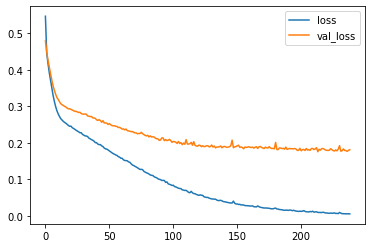

In [522]:
losses2.plot()

In [523]:
## WITH DROPOUT

In [591]:
tf_model = Sequential()

In [592]:
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dropout(0.5))
tf_model.add(Dense(26, activation='relu'))
tf_model.add(Dropout(0.5))
tf_model.add(Dense(13, activation='relu'))
tf_model.add(Dropout(0.5))

tf_model.add(Dense(1, activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy', optimizer='adam')

In [593]:
tf_model.fit(X_train_tf, y_train_tf, batch_size=256, epochs=400, validation_data=(X_test_tf, y_test_tf), 
             callbacks=[early_stop], class_weight={0:0.17,1:0.83})

Train on 3941 samples, validate on 1689 samples
Epoch 1/400
3941/3941 [==============================] - 2s 391us/sample - loss: 0.2160 - val_loss: 0.7144
Epoch 2/400
3941/3941 [==============================] - 0s 50us/sample - loss: 0.2137 - val_loss: 0.7223
Epoch 3/400
3941/3941 [==============================] - 0s 25us/sample - loss: 0.2074 - val_loss: 0.7173
Epoch 4/400
3941/3941 [==============================] - 0s 27us/sample - loss: 0.1987 - val_loss: 0.7155
Epoch 5/400
3941/3941 [==============================] - 0s 21us/sample - loss: 0.1989 - val_loss: 0.7100
Epoch 6/400
3941/3941 [==============================] - 0s 25us/sample - loss: 0.1968 - val_loss: 0.7038
Epoch 7/400
3941/3941 [==============================] - 0s 22us/sample - loss: 0.1960 - val_loss: 0.7022
Epoch 8/400
3941/3941 [==============================] - 0s 30us/sample - loss: 0.1939 - val_loss: 0.7021
Epoch 9/400
3941/3941 [==============================] - 0s 26us/sample - loss: 0.1934 - val_loss: 0.69

3941/3941 [==============================] - 0s 21us/sample - loss: 0.0965 - val_loss: 0.3156
Epoch 153/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.1007 - val_loss: 0.3220
Epoch 154/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0964 - val_loss: 0.3209
Epoch 155/400
3941/3941 [==============================] - 0s 15us/sample - loss: 0.0949 - val_loss: 0.3200
Epoch 156/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0946 - val_loss: 0.3228
Epoch 157/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.0951 - val_loss: 0.3095
Epoch 158/400
3941/3941 [==============================] - 0s 19us/sample - loss: 0.0974 - val_loss: 0.3171
Epoch 159/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0913 - val_loss: 0.3186
Epoch 160/400
3941/3941 [==============================] - 0s 15us/sample - loss: 0.0936 - val_loss: 0.3119
Epoch 161/400
3941/3941 [=================

Epoch 228/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0878 - val_loss: 0.2929
Epoch 229/400
3941/3941 [==============================] - 0s 18us/sample - loss: 0.0856 - val_loss: 0.2915
Epoch 230/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.0864 - val_loss: 0.2920
Epoch 231/400
3941/3941 [==============================] - 0s 32us/sample - loss: 0.0864 - val_loss: 0.2893
Epoch 232/400
3941/3941 [==============================] - 0s 20us/sample - loss: 0.0878 - val_loss: 0.2876
Epoch 233/400
3941/3941 [==============================] - 0s 15us/sample - loss: 0.0881 - val_loss: 0.2971
Epoch 234/400
3941/3941 [==============================] - 0s 15us/sample - loss: 0.0842 - val_loss: 0.2846
Epoch 235/400
3941/3941 [==============================] - 0s 17us/sample - loss: 0.0851 - val_loss: 0.2798
Epoch 236/400
3941/3941 [==============================] - 0s 16us/sample - loss: 0.0865 - val_loss: 0.2887
Epoch 237/400
3941/3941 [===

In [594]:
losses3 = pd.DataFrame(tf_model.history.history)

In [595]:
losses3

,loss,val_loss
0,0.216022,0.714434
1,0.213704,0.722262
2,0.207395,0.717336
3,0.198738,0.715534
4,0.198932,0.709987
...,...,...
346,0.080610,0.269592
347,0.078682,0.263690
348,0.078238,0.267802
349,0.079389,0.268678


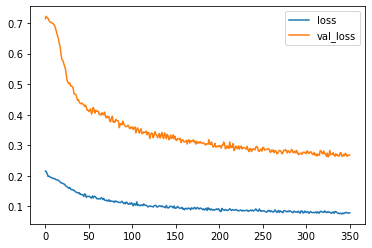

In [596]:
losses3.plot()

In [597]:
tf_model.predict_classes(X_test_tf)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [598]:
tf_pred = tf_model.predict_classes(X_test_tf)

In [599]:
print(classification_report(y_test_tf, tf_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1398
           1       0.63      0.85      0.72       291

    accuracy                           0.89      1689
   macro avg       0.80      0.87      0.83      1689
weighted avg       0.91      0.89      0.89      1689



In [600]:
print(confusion_matrix(y_test_tf, tf_pred))

[[1253  145]
 [  44  247]]


In [601]:
pwd

'/Users/shubhadeepbhattacharya/Desktop/DSBA/PGP/capstone/CC_EC_01 - Customer Churn - E-Commerce'